In [1]:
import networkx as nx
import numpy as np
import itertools

import matplotlib.pyplot as plt

In [2]:
G = nx.karate_club_graph()

print('#nodes:', len(G.nodes()), 'and', '#edges:', len(G.edges()))

#nodes: 34 and #edges: 78


In [3]:
node_to_degrees = sorted(dict(G.degree()).items(), key = lambda x: x[1], reverse = True)

## view the top 5,
node_to_degrees[:5]

[(33, 17), (0, 16), (32, 12), (2, 10), (1, 9)]

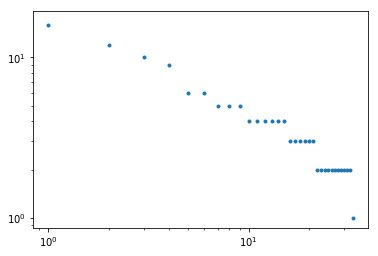

In [4]:
 plt.loglog(
    [ k for n, k in node_to_degrees ], 
    marker='.', linestyle='none')

plt.show()

In [5]:
## calculate degree centrality,
n_1 = float(len(node_to_degrees) - 1)
degree_centrality = [ (n, k, k/n_1) for n, k in node_to_degrees ]

## node, k, dc
sorted(degree_centrality, key = lambda x: x[2], reverse=True)

[(33, 17, 0.5151515151515151),
 (0, 16, 0.48484848484848486),
 (32, 12, 0.36363636363636365),
 (2, 10, 0.30303030303030304),
 (1, 9, 0.2727272727272727),
 (3, 6, 0.18181818181818182),
 (31, 6, 0.18181818181818182),
 (8, 5, 0.15151515151515152),
 (13, 5, 0.15151515151515152),
 (23, 5, 0.15151515151515152),
 (5, 4, 0.12121212121212122),
 (6, 4, 0.12121212121212122),
 (7, 4, 0.12121212121212122),
 (27, 4, 0.12121212121212122),
 (29, 4, 0.12121212121212122),
 (30, 4, 0.12121212121212122),
 (4, 3, 0.09090909090909091),
 (10, 3, 0.09090909090909091),
 (19, 3, 0.09090909090909091),
 (24, 3, 0.09090909090909091),
 (25, 3, 0.09090909090909091),
 (28, 3, 0.09090909090909091),
 (9, 2, 0.06060606060606061),
 (12, 2, 0.06060606060606061),
 (14, 2, 0.06060606060606061),
 (15, 2, 0.06060606060606061),
 (16, 2, 0.06060606060606061),
 (17, 2, 0.06060606060606061),
 (18, 2, 0.06060606060606061),
 (20, 2, 0.06060606060606061),
 (21, 2, 0.06060606060606061),
 (22, 2, 0.06060606060606061),
 (26, 2, 0.06060

In [6]:
## set degree centrality metrics on each node,
nx.set_node_attributes(G, dict([ (n, dc) for n, k, dc in degree_centrality ]), 'dc')

list(G.nodes(data = True))[:5]

[(0, {'club': 'Mr. Hi', 'dc': 0.48484848484848486}),
 (1, {'club': 'Mr. Hi', 'dc': 0.2727272727272727}),
 (2, {'club': 'Mr. Hi', 'dc': 0.30303030303030304}),
 (3, {'club': 'Mr. Hi', 'dc': 0.18181818181818182}),
 (4, {'club': 'Mr. Hi', 'dc': 0.09090909090909091})]

In [7]:
## draw,
layout = nx.spring_layout(G)

(-0.7604116530429893,
 1.083891083105019,
 -0.8054113882985315,
 0.7602622897784809)

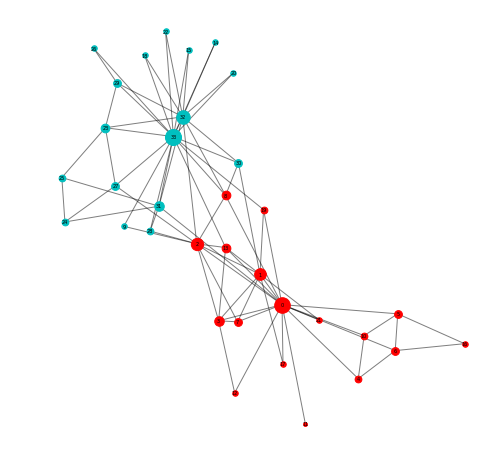

In [8]:
nodes = G.nodes(data = True)

clubs = np.unique([ data['club'] for n, data in nodes ])

plt.figure(figsize=(8, 8))

layout = nx.spring_layout(G)

colors = [ 'r', 'c' ]
for i, club in enumerate(clubs):
    color = colors[i]
    
    nodes_for_club = [ (n, data) for n, data in nodes if data['club'] == club ]
    
    for key, nodes_in_club in itertools.groupby(sorted(nodes_for_club, key=lambda x: x[1]['dc']), key=lambda x: x[1]['dc']):
        nodelist = [ n[0] for n in nodes_in_club ]
        nx.draw_networkx_nodes(
            G,
            layout,
            nodelist=nodelist,
            node_color=color,
            node_size=key*500)

nx.draw_networkx_labels(G, layout, dict([ (n[0], n[0]) for n in nodes ]), font_size=5)
nx.draw_networkx_edges(G, layout, width=1.0, alpha=0.5)

plt.axis('off')